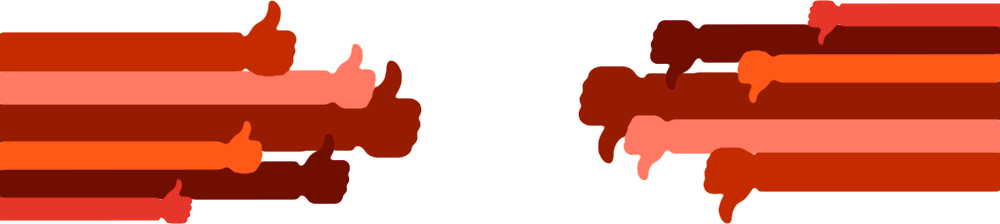

In [1]:
# 
from IPython import display
display.Image("../img/1_ej13O4MzDgG4MlGKK8kZrA.png")

# <b style = 'font-family:lmmonolt10 italic' > Santander Customer Satisfaction </b>

# <b style = 'font-family:lmmonolt10 italic'> Sumário </b>
<br> <b style = 'font-family:lmmonolt10 italic' > 1. Introdução </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 1. Problema de Negócio </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 2. Carregando Dados </b> </br> 
<br> <b style = 'font-family:lmmonolt10 italic' > 3. Analisando Dados </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 4. Feature Engine </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 4.1 Filter Methods </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 4.2 Wrapper Methods </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 5. Modelagem </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 5. Modelagem </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 6. Teste </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 7. Resultados </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 7.1   Receita, Custo e ROI  </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 7.2   Score para os clientes Santander  </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 7.3   Cluster mais lucrativos  </b> </br>
<br> <b style = 'font-family:lmmonolt10 italic' > 8. Referências </b> </br>

<h3> <b style = 'font-family:lmmonolt10 italic' > 1. Introdução </b> </h3>

<b style = 'font-family:lmmonolt10 italic'> 1.1 Problema de Negócio </b>

<br style = 'font-family:lmmonolt10 italic'> O Banco Santander quer identificar clientes insatisfeitos no inicio do relacionamento. Isso </br> 
<br style = 'font-family:lmmonolt10 italic'> irá permitir que o Santander adote medidas proativas para melhorar a felicidade de um cliente </br> 
<br style = 'font-family:lmmonolt10 italic'> antes que seja tarde demais. </br>

Dataset: https://www.kaggle.com/c/santander-customer-satisfaction/data

***

<br> Para resolver este case será usado um conjunto de dados sintéticos contendo um </br>
<br> grande número de variáveis numéricas. A coluna ‘TARGET’ é a variável resposta. </br>
<br> Ela é igual a 1 para clientes insatisfeitos e igual a 0 para clientes satisfeitos. </br>
<br> Duas bases são dadas, uma para treino e uma para avaliação. </br>

Três são as tarefas a serem realizadas.

***
<b style = 'font-family:lmmonolt10 italic' > 1.1 Ação de Retenção de Clientes Insatisfeitos Maximizando o Lucro </b> 

<br> Um falso positivo ocorre quando classificamos um cliente como insatisfeito, mas ela não se </br>
<br> comporta como tal. Neste caso, o custo de preparar e executar uma ação de retenção é um </br>
<br> valor fixo de 10 reais por cliente. Nada é ganho pois a ação de retenção não é capaz de mudar </br>
<br> o comportamento do cliente. Um falso negativo ocorre quando um cliente é previsto como </br>
<br> satisfeito, mas na verdade ele estava insatisfeito. Neste caso, nenhum dinheiro foi gasto e nada </br>
<br> foi ganho. Um verdadeiro positivo é um cliente que estava insatisfeito e foi alvo de uma ação de </br>
<br> retenção. O benefício neste caso é o lucro da ação (100 reais) menos os custos relacionados à ação  </br>
<br> de retenção (R$ 10). Por fim, um verdadeiro negativo é um cliente insatisfeito e que não é alvo de </br>
<br> nenhuma ação. O benefício neste caso é zero, isto é, nenhum custo, mas nenhum lucro.  </br>



***


<b style = 'font-family:lmmonolt10 italic' > 1.1. Score Clientes </b>

<br> A segunda tarefa consiste em dar uma nota de 1 a 5 para cada cliente da base teste, </br>
<br> respeitando a variável ‘TARGET’, isto é, o seu nível de satisfação, sendo 1 o mais insatisfeito </br>
<br> e 5 o mais satisfeito. Ao dar essa nota deve-se ter em mente que somente os clientes com nota </br>
<br> 1 serão alvos de uma ação de retenção e que o objetivo dessa ação é maximizar o lucro esperado </br>
<br> por cliente (usando os mesmos valores da primeira questão). </br>

***
<b style = 'font-family:lmmonolt10 italic'> 1.1. Clusterizando Grupos Lucrativos </b>


<br  style = 'font-family:lmmonolt10 italic'> Todo conjunto de dados é passível de ser dividido em grupos coesos, conhecidos </br>
<br style = 'font-family:lmmonolt10 italic'> como agrupamentos naturais. A terceira tarefa é encontrar os três grupos naturais que </br> 
<br style = 'font-family:lmmonolt10 italic'> possuem os maiores lucros esperados por cliente (usando os mesmos valores da primeira </br>
<br style = 'font-family:lmmonolt10 italic'> questão). </br>

***

<h3 style = 'font-family:lmmonolt10 italic'> <b> 2. Carregando Dados </b> </h3>

* <b style = 'font-family:lmmonolt10 italic' > 2.1 Importando bibliotecas </b>

In [1]:
# Conecção Kaggle Api
from kaggle.api.kaggle_api_extended import KaggleApi
import zipfile
import os

# 
from IPython import display

# Importando bibliotecas que serao utilizadas neste projeto
import warnings
warnings.filterwarnings("ignore")

# Visualização Dados de Treinamento
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Definindo jupyter como Backend para o matplotlib
%matplotlib inline

# Sklearn Feature Selection 
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, mutual_info_classif
from boruta import BorutaPy

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import ExtraTreeClassifier

# Importando livrarias para Feature Engeniring
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

# Importando livrarias para Clusterização
from sklearn.cluster import KMeans, DBSCAN

# Metricas para avaliação do desempenho
from sklearn.metrics import mean_absolute_error, f1_score

# Livrarias para tuning hipterparemetros modelos
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importando a livraria para Balanceamento dos Dados
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Tuning hiperparametros modelos 
from hyperopt import hp

# Explainer
import shap

* <b style = 'font-family:lmmonolt10 italic' > 2.2 Load DataSet `santander-customer-satisfaction` Competition From Kagglle to Repository </b>

In [2]:
api = KaggleApi()
api.authenticate()

api.competitions_list_cli(search= 'santander-customer-satisfaction')
api.competition_download_files('santander-customer-satisfaction')

file_path = './santander-customer-satisfaction.zip'
dir_to_extrac = '../data_sets/'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(dir_to_extrac)
    
os.remove(file_path)


ref                                         deadline             category   reward  teamCount  userHasEntered  
------------------------------------------  -------------------  --------  -------  ---------  --------------  
mpetitions/santander-customer-satisfaction  2016-05-02 23:59:00  Featured  $60,000       5115            True  


In [3]:
path_dt_train = '../data_sets/train.csv'
path_dt_test = '../data_sets/test.csv'
data_train = pd.read_csv(path_dt_train, sep= ',')
data_test = pd.read_csv(path_dt_test, sep= ',')

In [4]:
# Printando conjunto de dados de treinamento
data_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<h3> <b> 3. Analise Explorátoria Dados </b> </h3>

* <b> 3.1 Visão Geral dos Dados do DataSet de treino </b>

In [7]:
data_set_train = data_train.drop('ID', axis= 1)

In [8]:
data_set_train.shape

(76020, 370)

<div style = 'font-family:lmmonolt10 italic' > Verificamos a existência de `370 colunas`, e `76.020 observações` dentro do dataset de treino. </div>

In [9]:
# Verificando o número de registros duplicados.
data_set_train.duplicated().sum()

4807

* <b> 3.4 Analise Balanceamento Dados </b>

In [17]:
# Contagem clientes satisfeito insatisfeito 
number_client_df = data_train.TARGET.value_counts().to_frame().T
number_client_df.columns = ['satisfeito'.upper(), 'insatisfeito'.upper()]

fig = go.Figure()


labels = list(number_client_df.columns) # 
values = [np.array(number_client_df[column][0]) for column in number_client_df.columns] #

fig.add_trace(go.Pie(labels = labels, values= values, text = labels, hole = 0.35, name = 'TARGET', legendgroup= 'TARGET'))

#
fig.update_layout(
                legend_title='<b> Target </b>',
                title = '<b> Distribuicão Target Conjunto de Dados de Treinamento - Satisfeito vs Insatisfeito </b>',
                title_x = 0.5,
                height = 500
)

#
fig.show()

In [19]:
# Contagem clientes satisfeito insatisfeito
number_client_df = data_train.TARGET.value_counts().to_frame().T
number_client_df.columns = ['satisfeito'.upper(), 'insatisfeito'.upper()]

# Instanciando subplot
fig = go.Figure()

labels = list(number_client_df.columns) # 
values = [np.array(number_client_df[column][0]) for column in number_client_df.columns] #

fig.add_trace(go.Bar(x= list(number_client_df.columns), y = values, textsrc= 'labels', text= [f'{values[i]}' for i in range(0,2)], textposition='outside', showlegend= False,  name = 'TARGET', legendgroup = 'TARGET', marker_color = ['#636EFA', '#EF553B']))

fig.update_layout(
                title = '<b> Distribuicão das Classes Conjunto de Dados de Treinamento - Satisfeito vs Insatisfeito </b>',
                title_x = 0.5,
                legend_title='<b> Target </b>',
                xaxis_title = '<b> Classes </b>',
                yaxis_title = '<b> Números de Clientes </b>', 
                height = 600
)

#   
fig.show()

Pode-se notar que temos `3,96%` são clientes insatisfeitos e `96,04`% clientes satisfeitos

<h3> <b style = 'font-family:lmmonolt10 italic' >  4. Feature Selection </b> </h3>


# <h3> <b style = 'font-family:lmmonolt10 italic' > 5. Modelagem </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 6. Teste </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 7. Resultados </b> </h3>

# <h3> <b style = 'font-family:lmmonolt10 italic' > 8. Referências </b> </h3>

<div> 
<br> Feature Selection Is Important: State-of-the-Art Methods and Application Domains of Feature <br>
<br> Selection on High-Dimensional Data, Ano. Acesso em Maio de 2022. <br>
</div>
<br> <br>

<div> 
<p>
<br> R. Thiago - Resultados Digitais - ROI: o que é, como e por que calcular o Retorno sobre o <br> 
<br> Investimento, 2022. Disponivel em: https://resultadosdigitais.com.br/marketing/o-que-e-roi <br>
<br> -retorno-sobre-investimento/. Acesso em Maio de 2022. <br>
</p>
</div>